گام اول : ترسیم

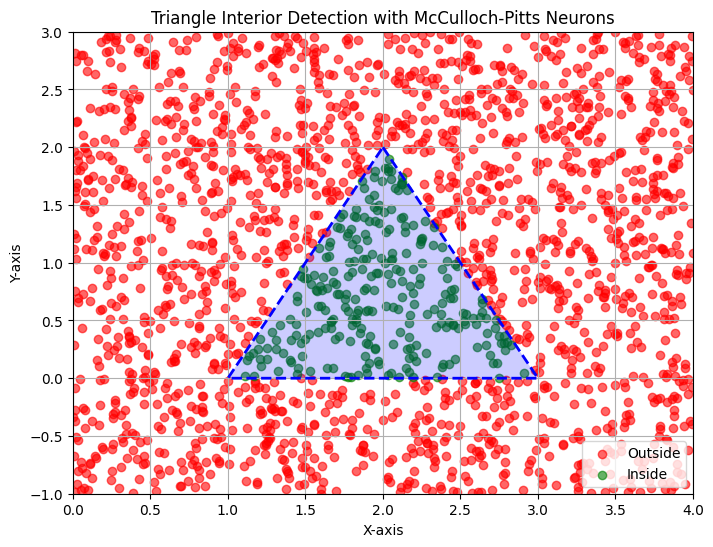

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Triangle vertices coordinates
A = (2, 2)
B = (3, 0)
C = (1, 0)

class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold, activation_type='step'):
        self.weights = np.array(weights)
        self.threshold = threshold
        self.activation_type = activation_type

    def model(self, inputs):
        net_input = np.dot(self.weights, inputs)
        # Step activation function
        if self.activation_type == 'step':
            return 1 if net_input >= self.threshold else 0
        return 0

# Boundary condition neurons
# 1. Condition y >= 0
neuron1 = McCulloch_Pitts_neuron([0, 1], 0)

# 2. Condition y <= -2x + 6 (converted to -2x - y +6 >=0)
neuron2 = McCulloch_Pitts_neuron([-2, -1], -6)

# 3. Condition y <= 2x -2 (converted to 2x - y -2 >=0)
neuron3 = McCulloch_Pitts_neuron([2, -1], 2)

# Final AND gate neuron
final_neuron = McCulloch_Pitts_neuron([1, 1, 1], 2.5)

def is_inside(x, y):
    # Check all boundary conditions
    out1 = neuron1.model([x, y])
    out2 = neuron2.model([x, y])
    out3 = neuron3.model([x, y])
    # Combine results with logical AND
    return final_neuron.model([out1, out2, out3])

# Generate random points
num_samples = 2000
x_coords = np.random.uniform(0, 4, num_samples)
y_coords = np.random.uniform(-1, 3, num_samples)

# Classify points
inside_x = []
inside_y = []
outside_x = []
outside_y = []

for x, y in zip(x_coords, y_coords):
    if is_inside(x, y):
        inside_x.append(x)
        inside_y.append(y)
    else:
        outside_x.append(x)
        outside_y.append(y)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(outside_x, outside_y, c='red', alpha=0.6, label='Outside')
plt.scatter(inside_x, inside_y, c='green', alpha=0.6, label='Inside')

# Draw triangle boundaries
triangle_x = [A[0], B[0], C[0], A[0]]
triangle_y = [A[1], B[1], C[1], A[1]]
plt.plot(triangle_x, triangle_y, 'b--', linewidth=2)
plt.fill(triangle_x[:3], triangle_y[:3], 'blue', alpha=0.2)

# Configure plot
plt.xlim(0, 4)
plt.ylim(-1, 3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Triangle Interior Detection with McCulloch-Pitts Neurons')
plt.grid(True)
plt.legend()
plt.show()

گام دوم

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Triangle vertices
A, B, C = (2, 2), (3, 0), (1, 0)

class McCullochPittsNeuron:
    def __init__(self, weights, threshold, activation_type='step',
                 lower_bound=None, upper_bound=None, inhibitory_indices=None):
        """
        activation_type options: 'step', 'sign', 'threshold_variation', 'inhibitory', 'piecewise'
        lower_bound, upper_bound: used for piecewise thresholding ([L, U] range)
        inhibitory_indices: indices of inputs that force output to 0 if active
        """
        self.weights = np.array(weights)
        self.threshold = threshold
        self.activation_type = activation_type
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.inhibitory_indices = inhibitory_indices if inhibitory_indices else []

    def model(self, x):
        net = np.dot(self.weights, x)

        # Inhibitory check
        if self.activation_type == 'inhibitory' and self.inhibitory_indices:
            if any(x[idx] == 1 for idx in self.inhibitory_indices):
                return 0

        # Apply activation function
        if self.activation_type == 'step':
            return 1 if net >= self.threshold else 0
        elif self.activation_type == 'sign':
            return 1 if net >= self.threshold else -1
        elif self.activation_type == 'threshold_variation':
            return 1 if net >= self.threshold else 0
        elif self.activation_type == 'piecewise':
            return 1 if self.lower_bound <= net <= self.upper_bound else 0
        return 1 if net >= self.threshold else 0

def generate_points(num_points=2000, x_range=(0, 4), y_range=(-1, 3)):
    x_values = np.random.uniform(*x_range, num_points)
    y_values = np.random.uniform(*y_range, num_points)
    return x_values, y_values

def plot_results(x_values, y_values, inside_indices, scenario_title):
    inside_x, inside_y = x_values[inside_indices], y_values[inside_indices]
    outside_x, outside_y = np.delete(x_values, inside_indices), np.delete(y_values, inside_indices)

    plt.figure(figsize=(8, 6))
    plt.scatter(outside_x, outside_y, color='red', label='Outside')
    plt.scatter(inside_x, inside_y, color='green', label='Inside')

    # Plot the triangle
    triangle_x, triangle_y = [A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]]
    plt.plot(triangle_x, triangle_y, color='blue', label='Triangle')
    plt.fill([A[0], B[0], C[0]], [A[1], B[1], C[1]], color='red', alpha=0.3, hatch='/', label='Area Inside')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(scenario_title)
    plt.grid(True)
    plt.xlim(0, 4)
    plt.ylim(-1, 3)
    plt.legend(loc='upper right')
    plt.show()

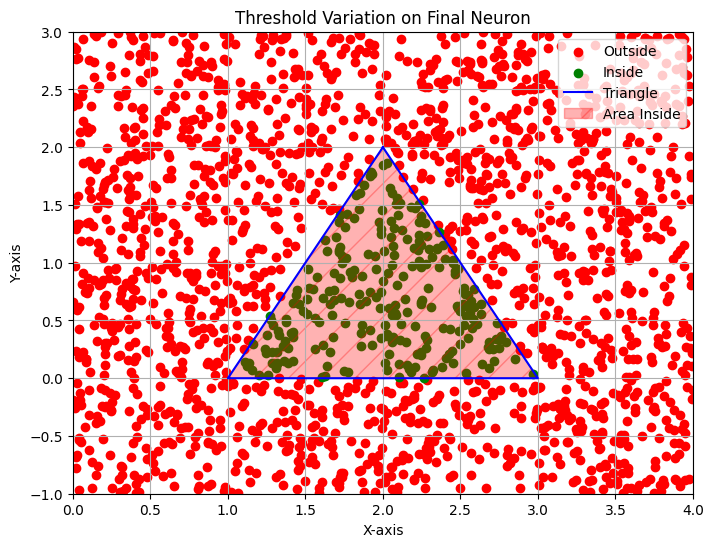

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Triangle vertices
A, B, C = (2, 2), (3, 0), (1, 0)

class McCullochPittsNeuron:
    def __init__(self, weights, threshold, activation_type='step',
                 lower_bound=None, upper_bound=None, inhibitory_indices=None):
        """
        activation_type options: 'step', 'sign', 'threshold_variation', 'inhibitory', 'piecewise'
        lower_bound, upper_bound: used for piecewise thresholding ([L, U] range)
        inhibitory_indices: indices of inputs that force output to 0 if active
        """
        self.weights = np.array(weights)
        self.threshold = threshold
        self.activation_type = activation_type
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.inhibitory_indices = inhibitory_indices if inhibitory_indices else []

    def model(self, x):
        net = np.dot(self.weights, x)

        # Inhibitory check
        if self.activation_type == 'inhibitory' and self.inhibitory_indices:
            if any(x[idx] == 1 for idx in self.inhibitory_indices):
                return 0

        # Apply activation function
        if self.activation_type == 'step':
            return 1 if net >= self.threshold else 0
        elif self.activation_type == 'sign':
            return 1 if net >= self.threshold else -1
        elif self.activation_type == 'threshold_variation':
            return 1 if net >= self.threshold else 0
        elif self.activation_type == 'piecewise':
            return 1 if self.lower_bound <= net <= self.upper_bound else 0
        return 1 if net >= self.threshold else 0

def generate_points(num_points=2000, x_range=(0, 4), y_range=(-1, 3)):
    x_values = np.random.uniform(*x_range, num_points)
    y_values = np.random.uniform(*y_range, num_points)
    return x_values, y_values

def plot_results(x_values, y_values, inside_indices, scenario_title):
    inside_x, inside_y = x_values[inside_indices], y_values[inside_indices]
    outside_x, outside_y = np.delete(x_values, inside_indices), np.delete(y_values, inside_indices)

    plt.figure(figsize=(8, 6))
    plt.scatter(outside_x, outside_y, color='red', label='Outside')
    plt.scatter(inside_x, inside_y, color='green', label='Inside')

    # Plot the triangle
    triangle_x, triangle_y = [A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]]
    plt.plot(triangle_x, triangle_y, color='blue', label='Triangle')
    plt.fill([A[0], B[0], C[0]], [A[1], B[1], C[1]], color='red', alpha=0.3, hatch='/', label='Area Inside')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(scenario_title)
    plt.grid(True)
    plt.xlim(0, 4)
    plt.ylim(-1, 3)
    plt.legend(loc='upper right')
    plt.show()

def inside_triangle_threshold_variation(x, y):
    """
    Like step function, but with an adjustable threshold for the final neuron.
    Example: making the final neuron stricter with θ=2.9.
    """
    neur1 = McCullochPittsNeuron([0, 1], 0, activation_type='threshold_variation')
    neur2 = McCullochPittsNeuron([-2, -1], -6, activation_type='threshold_variation')
    neur3 = McCullochPittsNeuron([2, -1], 2, activation_type='threshold_variation')
    neur_final = McCullochPittsNeuron([1, 1, 1], 2.9, activation_type='threshold_variation')

    z1, z2, z3 = neur1.model([x, y]), neur2.model([x, y]), neur3.model([x, y])
    return neur_final.model([z1, z2, z3])

# Example run for threshold variation
x_values, y_values = generate_points()
inside_indices = [i for i in range(len(x_values)) if inside_triangle_threshold_variation(x_values[i], y_values[i]) == 1]
plot_results(x_values, y_values, inside_indices, "Threshold Variation on Final Neuron")
